# CARES Act Recipients

<p> On March 27, 2020, the CARES (Coronavirus Aid, Relief, and Economic Security) Act was passed to combat the economic impact of COVID-19 in the United States. The $2 trillion law used a wide array of programs to reach individuals and organizations, including a stimulus check sent directly to eligible individuals. 

<p>Among the programs were a series of grants and loans that were awarded to public and private businesses as well as non-profit organizations (primarily hospitals). In order to qualify for assistance, organizations had to    </p>

<p> Using the COVID Stimulus Watch data provided by Good Jobs First [found here](https://data.covidstimuluswatch.org/prog.php?detail=refund), we can a take a look at the recipients of the various forms of awards and award amounts given through the CARES Act. </p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go

#df = pd.read_csv('C:/Users/geoff/Documents/GitHub/CARES-Stimulus/covidstimulus.csv') #laptop
#df = pd.read_csv('C:/Users/Geoffery George/Documents/GitHub/CARES-Stimulus/covidstimulus.csv') #desktop
df=pd.read_csv('https://data.covidstimuluswatch.org/prog.php?&detail=export_csv')

## Data

Let's take a quick look at our data. Using the 'head' and 'dtypes' commands allows us to preview the layout and values of our data as well as the properties of each value

In [2]:
df.head()

,Recipient Company,Parent Company,Award Date,Award Type,Grant Amount,Face Loan Amount,Awarding Agency,Program Name,Award Details,Data Source for Award,...,Parent Employment-related Penalties Since 2010,Parent Federal Corporate Income Tax Rate,"Parent Total Federal, State, and Local Subsidies Since 2010",Parent Government-contracting-related Penalties Since 2010,Parent Environmental / Healthcare / Safety Penalties Since 2010,Parent Consumer Protection / Financial / Competition-related Penaties Since 2010,Parent Ratio of CEO Pay to that of Average Worker,CEO Pay,Median Worker Pay,Parent TARP Loans Received During Financial Crisis
0,"Bion Environmental Technologies, Inc.","Bion Environmental Technologies, Inc.",20200511,grant,"$6,000",$0,Small Business Administration,Economic Injury Disaster Loan Emergency Advance,NaN,https://www.sec.gov/Archives/edgar/data/875729...,...,0,NaN,0,0,0,0,NaN,"$278,250",$0,0
1,Hylete Inc.,Hylete Inc.,20200429,grant,"$10,000",$0,Small Business Administration,Economic Injury Disaster Loan Emergency Advance,NaN,https://www.sec.gov/Archives/edgar/data/159973...,...,0,NaN,0,0,0,0,NaN,"$250,371",$0,0
2,"Lifted Liquids, Inc. d/b/a Lifted Made",Acquired Sales Corp.,20200422,grant,"$10,000",$0,Small Business Administration,Economic Injury Disaster Loan Emergency Advance,NaN,https://www.sec.gov/Archives/edgar/data/139113...,...,0,NaN,0,0,0,0,NaN,"$220,000",$0,0
3,"Trxade Group, Inc.","Trxade Group, Inc.",20200504,grant,"$10,000",$0,Small Business Administration,Economic Injury Disaster Loan Emergency Advance,NaN,https://www.sec.gov/Archives/edgar/data/138257...,...,0,NaN,0,0,0,0,NaN,"$749,842",$0,0
4,Hawaiian Airlines,Hawaiian Holdings,20200417,loan,$0,"$364,000,000",Treasury Department,Economic Relief Program,Hawaiian Holdings announced it would receive a...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,...,0,NaN,0,0,1347839,285000,45.9 to 1,"$3,196,153","$69,565",0


In [3]:
df.dtypes

Recipient Company                                                                    object
Parent Company                                                                       object
Award Date                                                                            int64
Award Type                                                                           object
Grant Amount                                                                         object
Face Loan Amount                                                                     object
Awarding Agency                                                                      object
Program Name                                                                         object
Award Details                                                                        object
Data Source for Award                                                                object
Facility Name                                                                   

The columns 'Face Loan Amount' and 'Grant Amount' should be numbers, but are listed as objects in the DataFrame. <br>If we want to be able to calculate values (sums, averages, etc.), we need to first remove the '$' and ',' and then convert the values to numbers:</br>

In [4]:
#remove dollar sign and commas, convert to float
df['Grant Amount'] = df['Grant Amount'].str.replace('$','')
df['Grant Amount'] = df['Grant Amount'].str.replace(',','')
df['Grant Amount'] = pd.to_numeric(df['Grant Amount'],errors='coerce') #'coerce' sets error as NaN


In [5]:
#do the same for Face Loan Amounts
df['Face Loan Amount'] = df['Face Loan Amount'].str.replace('$','')
df['Face Loan Amount'] = df['Face Loan Amount'].str.replace(',','')
df['Face Loan Amount'] = pd.to_numeric(df['Face Loan Amount'],errors='coerce')

We have the totals for grants and loans awarded, but we may need to use the sum of both.
<br>'Award Amount' can be created by adding 'Face Loan Amount' and 'Grant Amount'</br>

In [6]:
#creating one column makes calculating totals easier

df['Award Amount'] = df['Face Loan Amount'] + df['Grant Amount']
df['Award Amount']

0            6000
1           10000
2           10000
3           10000
4       364000000
          ...    
7108       176300
7109      1499360
7110       133257
7111       700000
7112      3234000
Name: Award Amount, Length: 7113, dtype: int64

Let's call df.head() to see what changes have been made to the DataFrame:

In [7]:
df.head()

,Recipient Company,Parent Company,Award Date,Award Type,Grant Amount,Face Loan Amount,Awarding Agency,Program Name,Award Details,Data Source for Award,...,Parent Federal Corporate Income Tax Rate,"Parent Total Federal, State, and Local Subsidies Since 2010",Parent Government-contracting-related Penalties Since 2010,Parent Environmental / Healthcare / Safety Penalties Since 2010,Parent Consumer Protection / Financial / Competition-related Penaties Since 2010,Parent Ratio of CEO Pay to that of Average Worker,CEO Pay,Median Worker Pay,Parent TARP Loans Received During Financial Crisis,Award Amount
0,"Bion Environmental Technologies, Inc.","Bion Environmental Technologies, Inc.",20200511,grant,6000,0,Small Business Administration,Economic Injury Disaster Loan Emergency Advance,NaN,https://www.sec.gov/Archives/edgar/data/875729...,...,NaN,0,0,0,0,NaN,"$278,250",$0,0,6000
1,Hylete Inc.,Hylete Inc.,20200429,grant,10000,0,Small Business Administration,Economic Injury Disaster Loan Emergency Advance,NaN,https://www.sec.gov/Archives/edgar/data/159973...,...,NaN,0,0,0,0,NaN,"$250,371",$0,0,10000
2,"Lifted Liquids, Inc. d/b/a Lifted Made",Acquired Sales Corp.,20200422,grant,10000,0,Small Business Administration,Economic Injury Disaster Loan Emergency Advance,NaN,https://www.sec.gov/Archives/edgar/data/139113...,...,NaN,0,0,0,0,NaN,"$220,000",$0,0,10000
3,"Trxade Group, Inc.","Trxade Group, Inc.",20200504,grant,10000,0,Small Business Administration,Economic Injury Disaster Loan Emergency Advance,NaN,https://www.sec.gov/Archives/edgar/data/138257...,...,NaN,0,0,0,0,NaN,"$749,842",$0,0,10000
4,Hawaiian Airlines,Hawaiian Holdings,20200417,loan,0,364000000,Treasury Department,Economic Relief Program,Hawaiian Holdings announced it would receive a...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,...,NaN,0,0,1347839,285000,45.9 to 1,"$3,196,153","$69,565",0,364000000


## Programs

Now we will take a look at the different programs offering grants and loans. The code below allows us to split each program by their award type (grant or loan) and the number of organizations receiving each program.

In [24]:
df.groupby('Award Type')['Recipient Company'].count()

Award Type
grant    6621
loan      492
Name: Recipient Company, dtype: int64

In [25]:
df.groupby('Award Type')['Award Amount'].sum()

Award Type
grant    55866469596
loan     10312545499
Name: Award Amount, dtype: int64

In [19]:
df.groupby(['Award Type','Program Name'])['Recipient Company'].count()

Award Type  Program Name                                                           
grant       Economic Injury Disaster Loan Emergency Advance                               4
            Higher Education Emergency Relief Fund (for-profits only)                    11
            Payroll Support Program                                                      95
            Provider Relief Fund COVID-19 High-Impact Payments                          395
            Public Health and Social Services Emergency Fund (Provider Relief Fund)    6116
loan        Economic Relief Program                                                       1
            Medicare Accelerated and Advance Payment Program                              7
            Paycheck Protection Program                                                 472
            Payroll Support Program                                                      12
Name: Recipient Company, dtype: int64

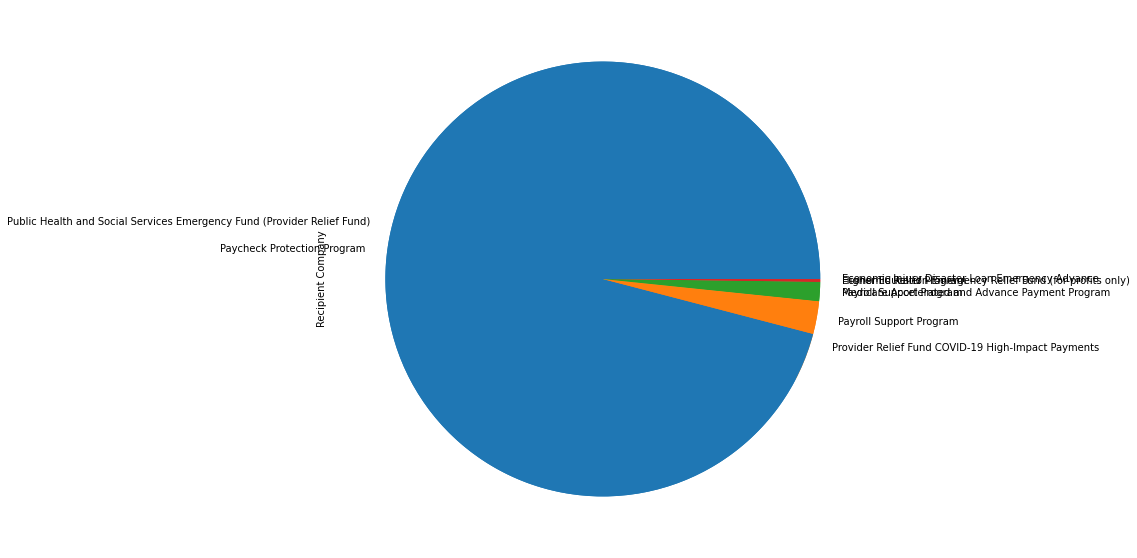

In [23]:
grants = df[df['Award Type']=='grant']
grants.groupby('Program Name')['Recipient Company'].count().sort_values(ascending=False).plot.pie(figsize=(10,10))
loans = df[df['Award Type']=='loan']
loans.groupby('Program Name')['Recipient Company'].count().sort_values(ascending=False).plot.pie(figsize=(10,10))
plt.show()

In [10]:
df.groupby('Ownership Structure')['Recipient Company'].count()

Ownership Structure
non-profit         1983
privately held     4516
publicly traded     614
Name: Recipient Company, dtype: int64

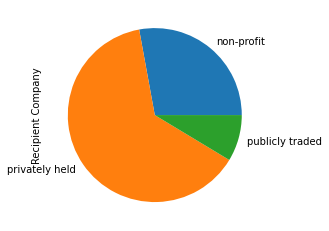

In [11]:
df.groupby('Ownership Structure')['Recipient Company'].count().plot.pie()

In [12]:
df.groupby('Ownership Structure')['Award Amount'].sum()

Ownership Structure
non-profit         20903908012
privately held     11102697033
publicly traded    34172410050
Name: Award Amount, dtype: int64

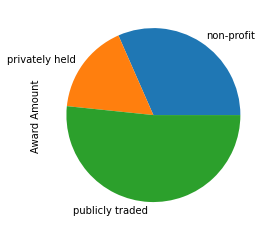

In [13]:
df.groupby('Ownership Structure')['Award Amount'].sum().plot.pie()

In [14]:
df.groupby('Program Name')['Award Amount'].sum().sort_values(ascending=False)

Program Name
Payroll Support Program                                                    29712582336
Public Health and Social Services Emergency Fund (Provider Relief Fund)    21109427797
Provider Relief Fund COVID-19 High-Impact Payments                         12000000008
Medicare Accelerated and Advance Payment Program                            1866200000
Paycheck Protection Program                                                 1087624449
Economic Relief Program                                                      364000000
Higher Education Emergency Relief Fund (for-profits only)                     39144505
Economic Injury Disaster Loan Emergency Advance                                  36000
Name: Award Amount, dtype: int64

In [16]:
px.pie(df,names='Program Name',values='Award Amount')

## Companies
Let's look at the companies receiving awards through the Payroll Support Program

In [17]:
df[df['Program Name']=='Payroll Support Program']

,Recipient Company,Parent Company,Award Date,Award Type,Grant Amount,Face Loan Amount,Awarding Agency,Program Name,Award Details,Data Source for Award,...,Parent Federal Corporate Income Tax Rate,"Parent Total Federal, State, and Local Subsidies Since 2010",Parent Government-contracting-related Penalties Since 2010,Parent Environmental / Healthcare / Safety Penalties Since 2010,Parent Consumer Protection / Financial / Competition-related Penaties Since 2010,Parent Ratio of CEO Pay to that of Average Worker,CEO Pay,Median Worker Pay,Parent TARP Loans Received During Financial Crisis,Award Amount
445,"Alaska Airlines, Inc. and Horizon Air Industri...",Alaska Air,20200423,loan,0,267000000,Treasury Department,Payroll Support Program,"Alaska Airlines and Horizon Air, subsidiaries ...",https://newsroom.alaskaair.com/2020-04-23-Alas...,...,-0.90%,104928413,0,6196729,675000,85.8 to 1,"$5,533,320","$64,528",0,267000000
446,Allegiant Air,Allegiant Air,20200421,loan,0,21000000,Treasury Department,Payroll Support Program,Allegiant announced it would receive a $21 mil...,http://ir.allegiantair.com/news-releases/news-...,...,NaN,1299000,0,2003501,610000,57 to 1,"$2,850,307","$50,047",0,21000000
447,American Airlines,American Airlines,20200414,loan,0,1700000000,Treasury Department,Payroll Support Program,American Airlines announced it would receive $...,http://news.aa.com/news/news-details/2020/Amer...,...,NaN,72728542,22100000,79705372,5540000,195 to 1,"$11,999,517","$61,527",0,1700000000
448,"Delta Air Lines, Inc.",Delta Air Lines,20200420,loan,0,1600000000,Treasury Department,Payroll Support Program,Delta received a total of $5.4 billion in assi...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,...,-3.70%,4451911,0,2415787,42720000,184 to 1,"$14,982,448","$81,355",0,1600000000
449,Hawaiian Airlines,Hawaiian Holdings,20200414,loan,0,57000000,Treasury Department,Payroll Support Program,Hawaiian Holdings announced it would receive a...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,...,NaN,0,0,1347839,285000,45.9 to 1,"$3,196,153","$69,565",0,57000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7058,United Airlines Inc.,United Airlines Holdings,20200421,grant,4958498096,0,Treasury Department,Payroll Support Program,NaN,https://home.treasury.gov/policy-issues/cares/...,...,0.40%,69093395,0,11165271,9437000,169 to 1,"$12,643,005","$74,750",0,4958498096
7059,Valley Air Service Inc.,Valley Air Service Inc.,20200423,grant,51384,0,Treasury Department,Payroll Support Program,NaN,https://home.treasury.gov/policy-issues/cares/...,...,NaN,0,0,0,0,NaN,$0,$0,0,51384
7060,Wing Aviation Charter Services LLC,Wing Aviation Charter Services LLC,20200420,grant,4740313,0,Treasury Department,Payroll Support Program,NaN,https://home.treasury.gov/policy-issues/cares/...,...,NaN,0,0,0,0,NaN,$0,$0,0,4740313
7061,Wings Airways LLC,Wings Airways LLC,20200420,grant,621346,0,Treasury Department,Payroll Support Program,NaN,https://home.treasury.gov/policy-issues/cares/...,...,NaN,0,0,0,0,NaN,$0,$0,0,621346
